In [262]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [212]:
df = pd.read_csv("datasets/bank-additional-full.csv", delimiter=';')

Bank client data :
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [213]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [214]:
df.shape

(41188, 21)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [216]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [217]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


C:\Users\petya\AppData\Local\Temp\ipykernel_4788\3413306791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Reds', annot=True)
C:\Users\petya\AppData\Local\Temp\ipykernel_4788\3413306791.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


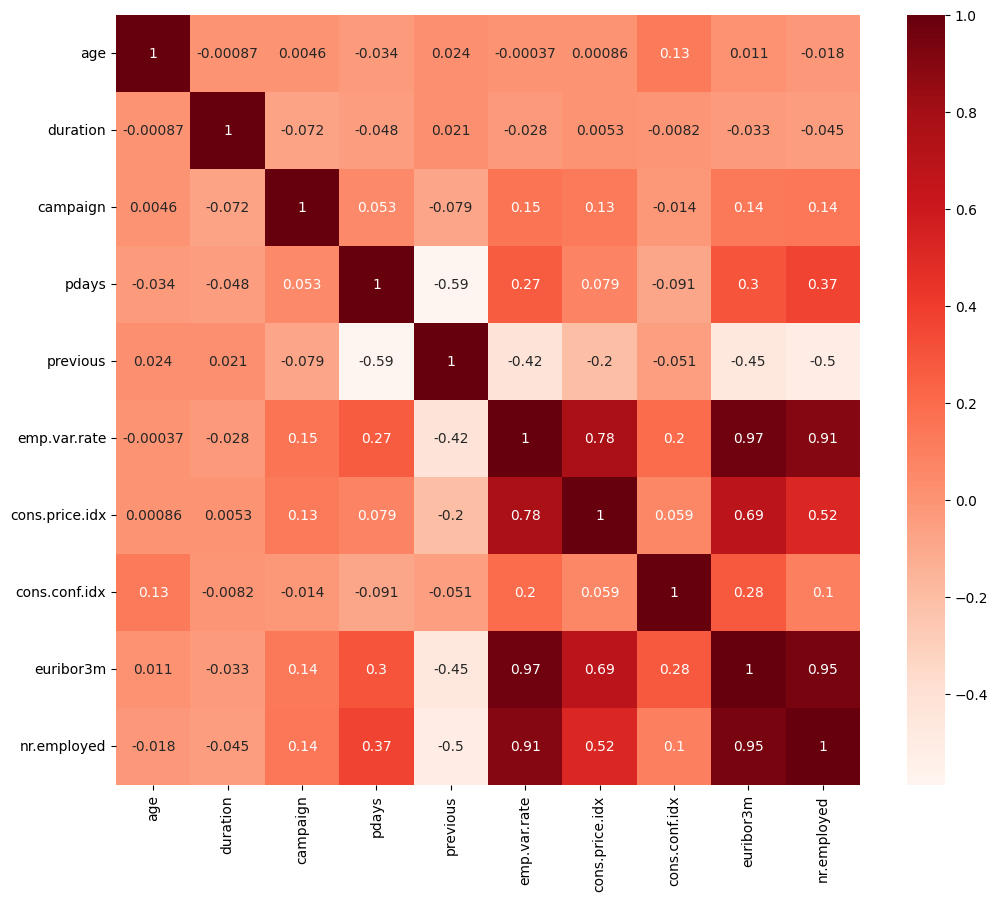

In [218]:
plt = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()

Heatmap digunakan untuk melihat korelasi antar variabel 

In [219]:
x = df.drop(['y'], axis=1)
y = df['y']

- Pisahkan mana X (feature) dengan Y
- Y adalah kolom "y"

In [220]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [221]:
dfx = pd.get_dummies(x)
dfx.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

In [222]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [223]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [224]:
X_train,X_test,y_train,y_test = train_test_split(dfx,y,test_size = 0.25,random_state = 123)

Split menjadi train dan test dengan test_size 25%

Logistic Regression 

In [225]:
model1 =LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y_pred_1 = model1.predict(X_test)

In [226]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      9114
         yes       0.70      0.42      0.52      1183

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



In [227]:
print("Accuracy:", accuracy_score(y_test, y_pred_1))

Accuracy: 0.9124016703894338


K-Nearest Neighbor

In [228]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred_2 = model2.predict(X_test)

In [229]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9114
         yes       0.59      0.49      0.54      1183

    accuracy                           0.90     10297
   macro avg       0.76      0.72      0.74     10297
weighted avg       0.90      0.90      0.90     10297



In [230]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))

Accuracy: 0.9025929882490046


Support Vector Machine

In [231]:
model3 = SVC()
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)

In [232]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9114
         yes       0.66      0.22      0.33      1183

    accuracy                           0.90     10297
   macro avg       0.79      0.60      0.64     10297
weighted avg       0.88      0.90      0.87     10297



In [233]:
print("Accuracy:", accuracy_score(y_test, y_pred_3))

Accuracy: 0.8977372050111683


Decision Tree

In [234]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
y_pred_4 = model4.predict(X_test)

In [235]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      9114
         yes       0.51      0.54      0.53      1183

    accuracy                           0.89     10297
   macro avg       0.73      0.74      0.73     10297
weighted avg       0.89      0.89      0.89     10297



In [236]:
print("Accuracy:", accuracy_score(y_test, y_pred_4))

Accuracy: 0.8887054481887928


Random Forrest

In [237]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
y_pred_5 = model5.predict(X_test)

In [238]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      9114
         yes       0.66      0.49      0.56      1183

    accuracy                           0.91     10297
   macro avg       0.80      0.73      0.75     10297
weighted avg       0.90      0.91      0.91     10297



In [239]:
print("Accuracy:", accuracy_score(y_test, y_pred_5))

Accuracy: 0.91162474507138


Naive Bayes

In [240]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred_6 = model6.predict(X_test)

In [241]:
print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92      9114
         yes       0.42      0.52      0.47      1183

    accuracy                           0.86     10297
   macro avg       0.68      0.72      0.70     10297
weighted avg       0.88      0.86      0.87     10297



In [242]:
print("Accuracy:", accuracy_score(y_test, y_pred_6))

Accuracy: 0.8634553753520443


Secara keseluruhan pada kasus ini model Logistic regression mendapatkan akurasi yang paling tinggi, maka model 1 akan diguanakan untuk Confusion matrix

In [243]:
print("Logistic regressin     :", accuracy_score(y_test, y_pred_1))
print("K-Nearest Neighbor     :", accuracy_score(y_test, y_pred_2))
print("Support Vector Machine :", accuracy_score(y_test, y_pred_3))
print("Decision Tree          :", accuracy_score(y_test, y_pred_4))
print("Randon Forest          :", accuracy_score(y_test, y_pred_5))
print("GaussianB              :", accuracy_score(y_test, y_pred_6))

Logistic regressin     : 0.9124016703894338
K-Nearest Neighbor     : 0.9025929882490046
Support Vector Machine : 0.8977372050111683
Decision Tree          : 0.8887054481887928
Randon Forest          : 0.91162474507138
GaussianB              : 0.8634553753520443


In [253]:
y_score = model1.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model1.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model1.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

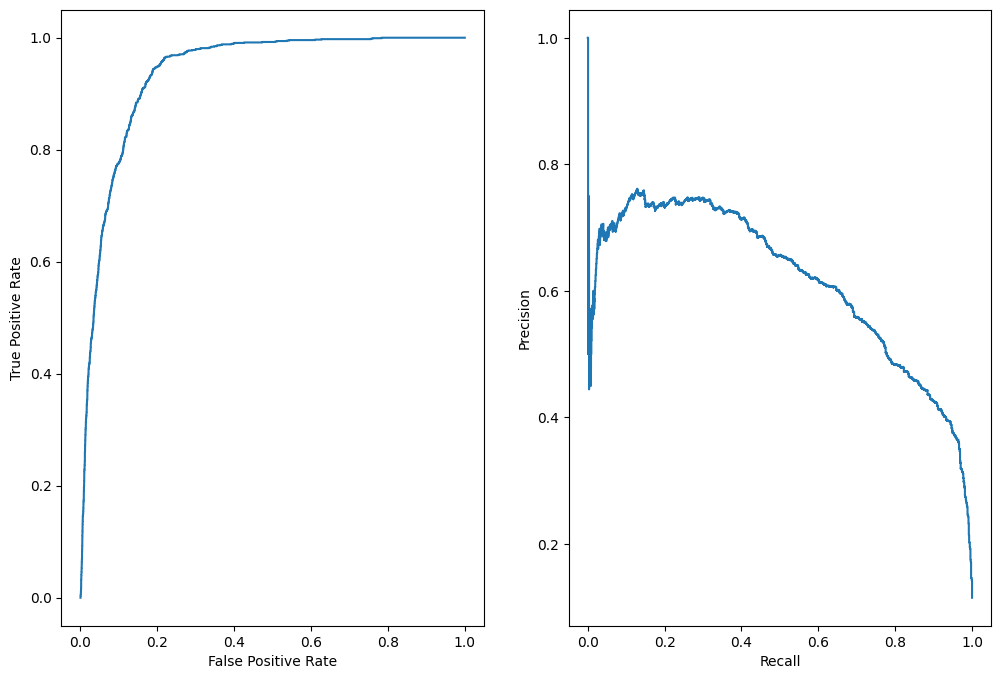

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

Confusion Matrix

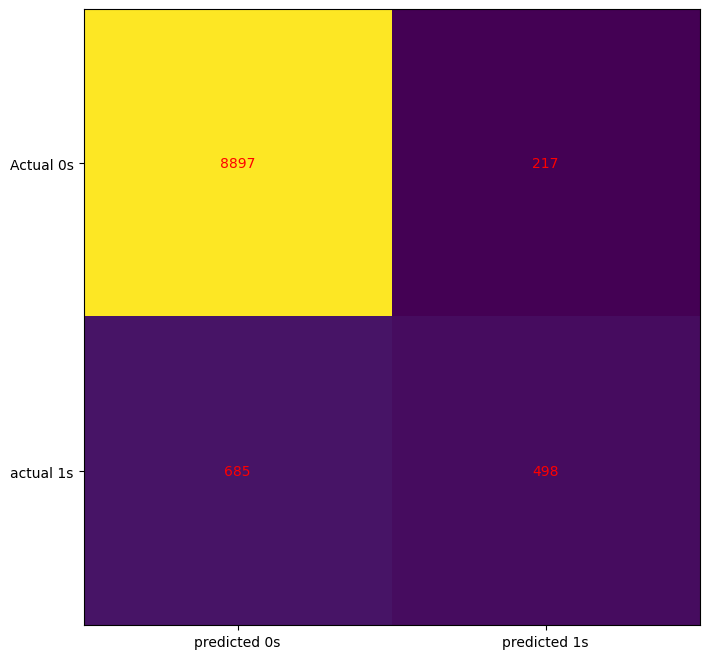

In [263]:
cm = confusion_matrix(y_test, y_pred_1)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Setelah dilakukan Confusion Matrix : 
- True Negatives 8897
- False Negatives 685
- False Positives 217
- True Positives 498